In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import geodatasets

from shapely.geometry import Point

import networkx as nx

In [3]:
earthquake_data = pd.read_csv("data/earthquakes.csv")

In [4]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [5]:
earthquake_data.shape

(23412, 21)

In [6]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [7]:
earthquake_data["Magnitude Type"].astype("category")

0         MW
1         MW
2         MW
3         MW
4         MW
        ... 
23407     ML
23408     ML
23409    MWW
23410    MWW
23411     MB
Name: Magnitude Type, Length: 23412, dtype: category
Categories (10, object): ['MB', 'MD', 'MH', 'ML', ..., 'MWB', 'MWC', 'MWR', 'MWW']

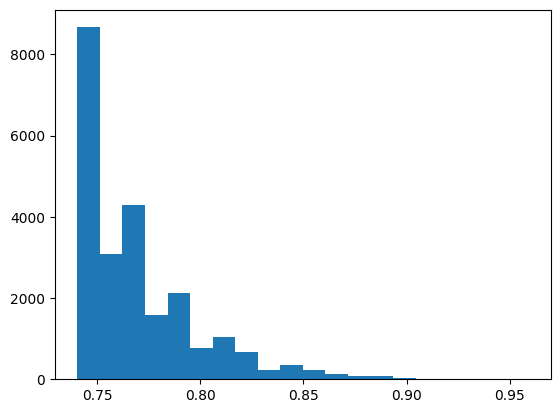

In [8]:
plt.hist(np.log10(earthquake_data.Magnitude), bins=20)
plt.show()

In [9]:
earthquake_data.nlargest(5, "Magnitude")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,...,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,...,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


In [10]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time

In [11]:
# dt_info.str.len().sort_values(ascending=False).value_counts()

In [12]:
dt_info[dt_info.str.len() <= 19].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       23402, 23403, 23404, 23405, 23406, 23407, 23408, 23409, 23410, 23411],
      dtype='int64', length=23409)

In [13]:
dt_info

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
                ...         
23407    12/28/2016 08:22:12
23408    12/28/2016 09:13:47
23409    12/28/2016 12:38:51
23410    12/29/2016 22:30:19
23411    12/30/2016 20:08:28
Length: 23412, dtype: object

In [14]:
earthquake_data = earthquake_data.loc[dt_info[dt_info.str.len() <=19].index]

In [15]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time

In [16]:
dt_info.str.len().value_counts()

19    23409
Name: count, dtype: int64

In [17]:
earthquake_data["Datetime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

In [18]:
earthquake_data = earthquake_data.drop(columns=["Date", "Time"])

In [19]:
earthquake_data

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Datetime
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


In [20]:
num_earthquakes_by_year = earthquake_data.groupby(earthquake_data.Datetime.dt.year).size()

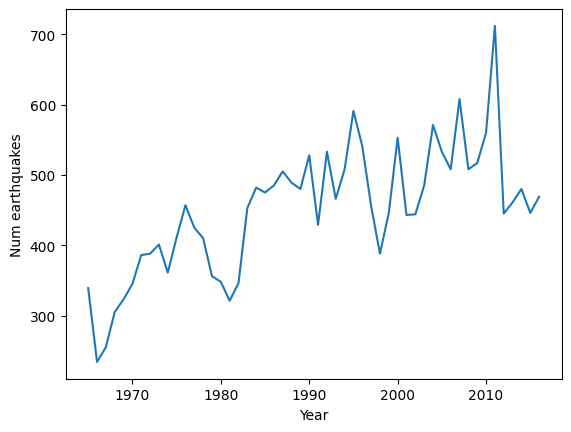

In [21]:
plt.plot(num_earthquakes_by_year)
plt.xlabel("Year")
plt.ylabel("Num earthquakes")
plt.show()

In [22]:
num_earthquakes_by_year

Datetime
1965    339
1966    234
1967    255
1968    305
1969    323
1970    345
1971    386
1972    388
1973    401
1974    361
1975    411
1976    457
1977    425
1978    410
1979    356
1980    348
1981    321
1982    346
1983    453
1984    482
1985    475
1986    485
1987    505
1988    489
1989    480
1990    528
1991    429
1992    533
1993    466
1994    508
1995    591
1996    541
1997    456
1998    388
1999    446
2000    553
2001    443
2002    444
2003    485
2004    571
2005    533
2006    508
2007    608
2008    508
2009    517
2010    560
2011    712
2012    445
2013    461
2014    480
2015    446
2016    469
dtype: int64

In [23]:
earthquake_data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [24]:
earthquake_data.Type.value_counts()

Type
Earthquake           23229
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [25]:
geodatasets.data.naturalearth.land.url

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [26]:
geodatasets.get_url("naturalearth.land")

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [27]:
land = gpd.read_file(geodatasets.data.naturalearth.land.url)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

In [ ]:
land.types

NameError: name 'land' is not defined

In [ ]:
land.plot(figsize = (12, 10))
plt.gca().set_facecolor("aqua")

NameError: name 'land' is not defined

In [ ]:
gpd.GeoDataFrame(earthquake_data)

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Datetime
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


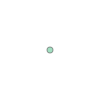

In [ ]:
Point(4, 3)

In [ ]:
earthquake_data.Latitude, earthquake_data.Longitude

(0        19.2460
 1         1.8630
 2       -20.5790
 3       -59.0760
 4        11.9380
           ...   
 23407    38.3917
 23408    38.3777
 23409    36.9179
 23410    -9.0283
 23411    37.3973
 Name: Latitude, Length: 23409, dtype: float64,
 0        145.6160
 1        127.3520
 2       -173.9720
 3        -23.5570
 4        126.4270
            ...   
 23407   -118.8941
 23408   -118.8957
 23409    140.4262
 23410    118.6639
 23411    141.4103
 Name: Longitude, Length: 23409, dtype: float64)

In [ ]:
points = []
for i, row in earthquake_data.iterrows():
    points.append(Point(row.Longitude, row.Latitude))

In [ ]:
points

[<POINT (145.616 19.246)>,
 <POINT (127.352 1.863)>,
 <POINT (-173.972 -20.579)>,
 <POINT (-23.557 -59.076)>,
 <POINT (126.427 11.938)>,
 <POINT (166.629 -13.405)>,
 <POINT (87.867 27.357)>,
 <POINT (166.212 -13.309)>,
 <POINT (-27.043 -56.452)>,
 <POINT (178.487 -24.563)>,
 <POINT (108.988 -6.807)>,
 <POINT (125.952 -2.608)>,
 <POINT (161.703 54.636)>,
 <POINT (-177.864 -18.697)>,
 <POINT (73.251 37.523)>,
 <POINT (139.741 -51.84)>,
 <POINT (178.715 51.251)>,
 <POINT (175.055 51.639)>,
 <POINT (172.007 52.528)>,
 <POINT (175.746 51.626)>,
 <POINT (177.848 51.037)>,
 <POINT (173.975 51.73)>,
 <POINT (173.058 51.775)>,
 <POINT (172.588 52.611)>,
 <POINT (174.368 51.831)>,
 <POINT (173.969 51.948)>,
 <POINT (179.605 51.443)>,
 <POINT (171.974 52.773)>,
 <POINT (174.696 51.772)>,
 <POINT (171.091 52.975)>,
 <POINT (170.874 52.99)>,
 <POINT (175.045 51.536)>,
 <POINT (-44.922 13.245)>,
 <POINT (174.206 51.812)>,
 <POINT (174.841 51.762)>,
 <POINT (174.321 52.438)>,
 <POINT (173.84 51.946)>

In [ ]:
earthquake_data = gpd.GeoDataFrame(data = earthquake_data, geometry=points, crs="epsg:4326")

<Axes: >

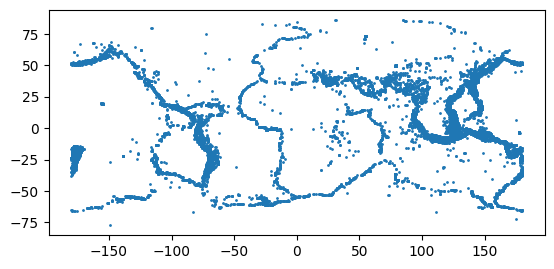

In [ ]:
earthquake_data.plot(markersize=1)

In [ ]:
ax = land.plot(figsize = (15, 12), color="coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax = ax, c = "r", markersize = 1)
plt.title("Map of earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

NameError: name 'land' is not defined

In [ ]:
volcano_data = pd.read_csv("data/volcanos.csv")

In [ ]:
points = [Point(x) for x in zip(volcano_data.Longitude, volcano_data.Latitude)]

In [ ]:
volcano_data = gpd.GeoDataFrame(data=volcano_data, geometry=points, crs="epsg:4326")

In [ ]:
ax = land.plot(figsize = (15, 12), color="coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax = ax, c = "r", markersize = 1)
volcano_data.plot(ax = ax, c = "r", markersize = 1)
plt.title("Map of earthquakes and volcanos")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

NameError: name 'land' is not defined

In [ ]:
land.to_crs(epsg=3395).plot()

NameError: name 'land' is not defined

In [ ]:
states = gpd.read_file("data/s_22mr22/")

In [ ]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

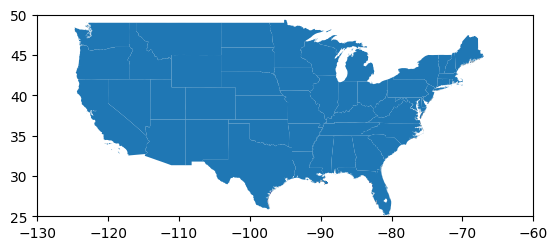

In [ ]:
ax = states.plot()
ax.set_ylim(25, 50)
ax.set_xlim(-130, -60)
plt.show()

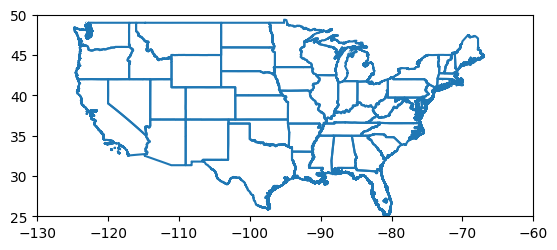

In [ ]:
ax = states.boundary.plot()
ax.set_ylim(25, 50)
ax.set_xlim(-130, -60)
plt.show()

In [ ]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv", low_memory=False usecols=["datetime", "country", "state", "latitude", "longitude"])

In [ ]:
ufos = ufos[ufos.country == "us"]

In [ ]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude"]]

In [ ]:
num_sightings = ufos.groupby("state").size()

In [ ]:
state_names = pd.read_csv("data/states.csv")

In [ ]:
num_sightings.index.str.upper()

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [ ]:
num_sightings

,level_0,index,state,num_sightings
0,0,0,AK,319
1,1,1,AL,642
2,2,2,AR,588
3,3,3,AZ,2414
4,4,4,CA,8912
5,5,5,CO,1413
6,6,6,CT,892
7,7,7,DC,7
8,8,8,DE,166
9,9,9,FL,3835


In [ ]:
num_sightings = num_sightings.reset_index().rename(columns= {0: "count"})

ValueError: cannot insert level_0, already exists

In [ ]:
num_sightings.state = num_sightings.state.str.upper()

In [ ]:
num_sightings.merge(state_names, left_on="state", right_on="abbreviation")[["name", "count"]]

,level_0,index,state,num_sightings,abbreviation,name
0,0,0,AK,319,AK,Alaska
1,1,1,AL,642,AL,Alabama
2,2,2,AR,588,AR,Arkansas
3,3,3,AZ,2414,AZ,Arizona
4,4,4,CA,8912,CA,California
5,5,5,CO,1413,CO,Colorado
6,6,6,CT,892,CT,Connecticut
7,7,7,DC,7,DC,District of Columbia
8,8,8,DE,166,DE,Delaware
9,9,9,FL,3835,FL,Florida


<Axes: >

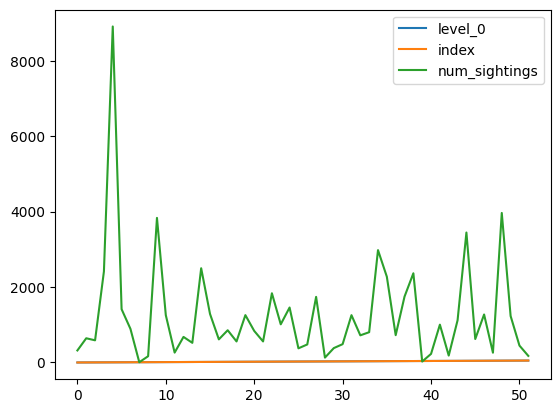

In [ ]:
num_sightings.plot()

In [ ]:
gpd.GeoDataFrame(data=num_sightings, geometry=states.geometry, crs = states.crs)

,level_0,index,state,num_sightings,geometry
0,0,0,AK,319,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,1,1,AL,642,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,2,2,AR,588,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,3,3,AZ,2414,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,4,4,CA,8912,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,5,5,CO,1413,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,6,6,CT,892,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,7,7,DC,7,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,8,8,DE,166,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,9,9,FL,3835,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


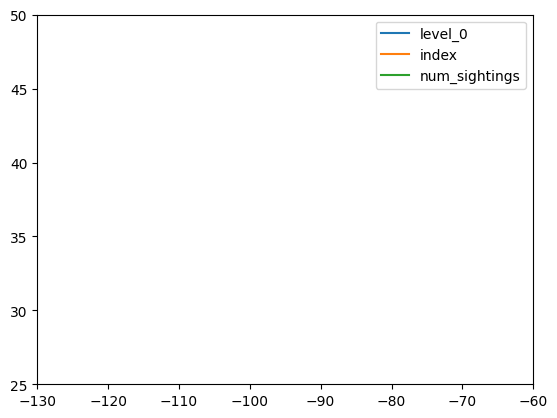

In [ ]:
ax = num_sightings.plot(column="count", legend=True)
ax.set_ylim(25, 50)
ax.set_xlim(-130, -60)
plt.show()

In [ ]:
num_sightings.geometry.centroid.plot()

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [ ]:
graphs

In [3]:
g = nx.Graph()

In [4]:
g.add_edge("a", "b", weight=0.1)
g.add_edge("b", "c", weight=1.5)
g.add_edge("a", "c", weight=1.0)
g.add_edge("c", "d", weight=2.2)

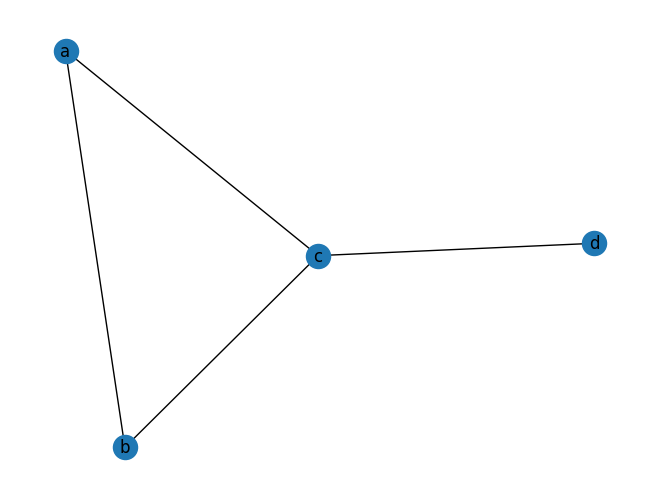

In [6]:
nx.draw(g, with_labels = True)
plt.show()

In [8]:
nx.shortest_path(g, "a", "d", weight="weight")

['a', 'c', 'd']

In [9]:
nx.shortest_path_length(g, "a", "d", weight="weight")

3.2

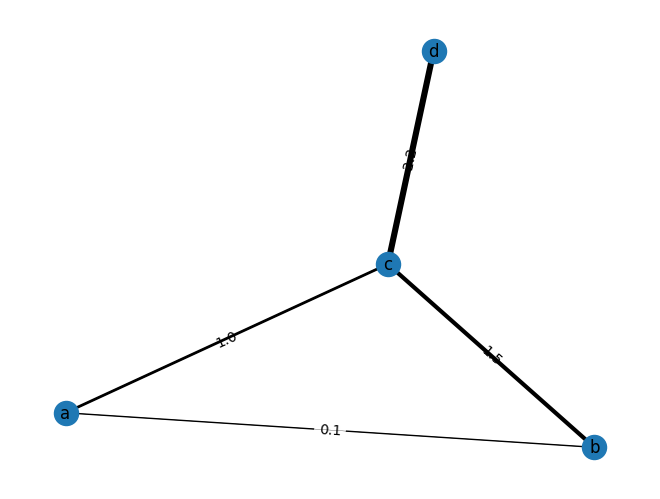

In [11]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels=True)
nx.draw_networkx_edge_labels(g, pos, edge_labels=weights)
nx.draw_networkx_edges(g, pos, width=[v * 2 for v in weights.values()])
plt.show()

In [14]:
g = nx.DiGraph()

In [15]:
g.add_edge("a", "b", weight=0.1)
g.add_edge("b", "c", weight=1.5)
g.add_edge("a", "c", weight=1.0)
g.add_edge("c", "d", weight=2.2)

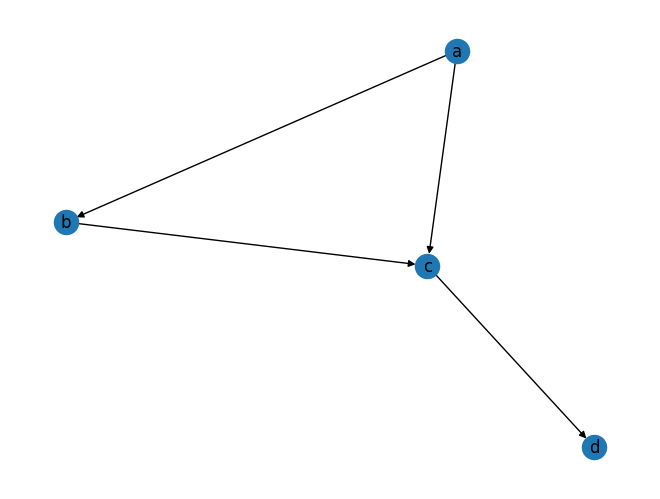

In [16]:
nx.draw(g, with_labels=True)

In [17]:
nx.shortest_path(g, "a", "d")

['a', 'c', 'd']

In [18]:
g = nx.Graph()
g.add_edge("a", "b")
g.add_edge("b", "d")
g.add_edge("d", "c")
g.add_edge("b", "d")
g.add_edge("a", "d")

g.add_edge("m", "n")
g.add_edge("n", "p")

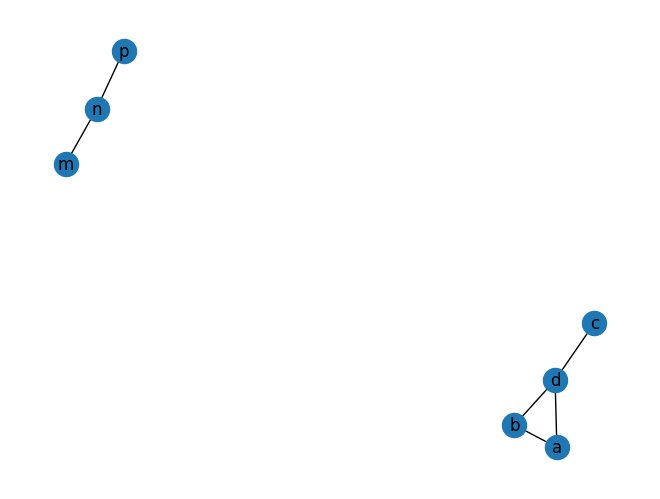

In [19]:
nx.draw(g, with_labels=True)

In [20]:
with open("data/facebook_combined.txt") as f:
    print(f.readlines())

['0 1\n', '0 2\n', '0 3\n', '0 4\n', '0 5\n', '0 6\n', '0 7\n', '0 8\n', '0 9\n', '0 10\n', '0 11\n', '0 12\n', '0 13\n', '0 14\n', '0 15\n', '0 16\n', '0 17\n', '0 18\n', '0 19\n', '0 20\n', '0 21\n', '0 22\n', '0 23\n', '0 24\n', '0 25\n', '0 26\n', '0 27\n', '0 28\n', '0 29\n', '0 30\n', '0 31\n', '0 32\n', '0 33\n', '0 34\n', '0 35\n', '0 36\n', '0 37\n', '0 38\n', '0 39\n', '0 40\n', '0 41\n', '0 42\n', '0 43\n', '0 44\n', '0 45\n', '0 46\n', '0 47\n', '0 48\n', '0 49\n', '0 50\n', '0 51\n', '0 52\n', '0 53\n', '0 54\n', '0 55\n', '0 56\n', '0 57\n', '0 58\n', '0 59\n', '0 60\n', '0 61\n', '0 62\n', '0 63\n', '0 64\n', '0 65\n', '0 66\n', '0 67\n', '0 68\n', '0 69\n', '0 70\n', '0 71\n', '0 72\n', '0 73\n', '0 74\n', '0 75\n', '0 76\n', '0 77\n', '0 78\n', '0 79\n', '0 80\n', '0 81\n', '0 82\n', '0 83\n', '0 84\n', '0 85\n', '0 86\n', '0 87\n', '0 88\n', '0 89\n', '0 90\n', '0 91\n', '0 92\n', '0 93\n', '0 94\n', '0 95\n', '0 96\n', '0 97\n', '0 98\n', '0 99\n', '0 100\n', '0 101\

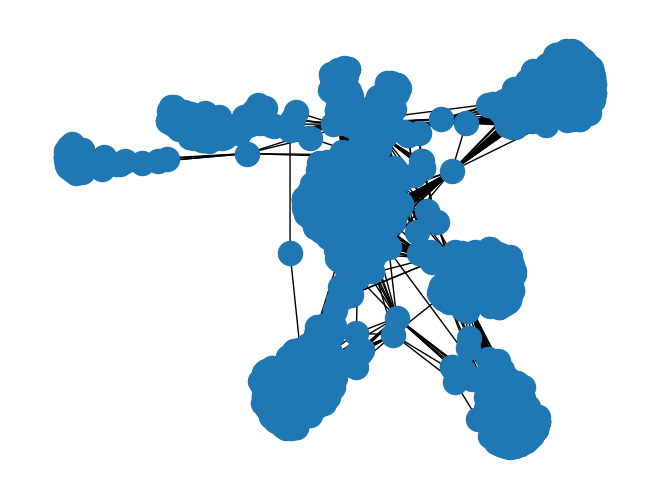

In [21]:
facebook_graph = nx.read_edgelist("data/facebook_combined.txt")
nx.draw(facebook_graph)

In [24]:
karate_graph = nx.karate_club_graph()

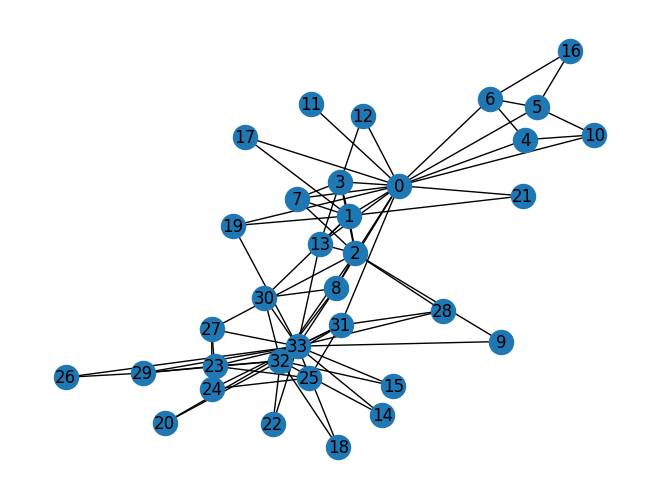

In [23]:
nx.draw(karate_graph, with_labels=True)

In [27]:
pos = nx.circular_layout(karate_graph)

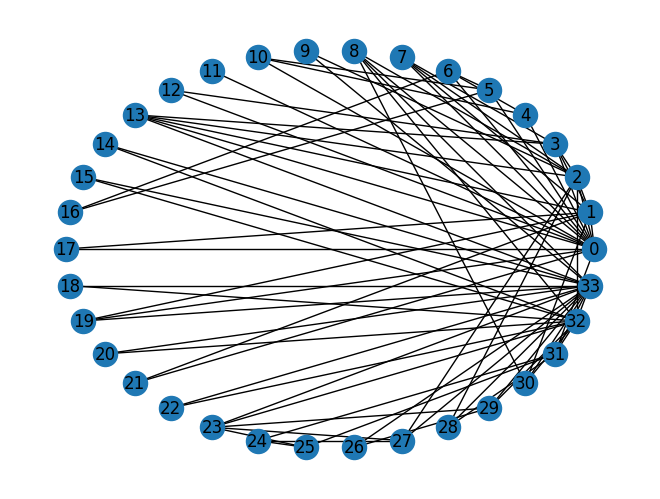

In [28]:
nx.draw(karate_graph, pos, with_labels=True)

In [29]:
nx.closeness_centrality(karate_graph)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [30]:
for x in nx.algorithms.community.girvan_newman(karate_graph):
    print(x)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25